**Here is the Basic Trained model of HousePrice Predictor in California✈**
# Introduction
Author: Amir Mohammad Shams / [ThirdPersonLife](https://thirdpersonlife.ir/)
Let's having fun together XD

*Desciption*: Hi, We have a dataset of more than 3400 rows of data that shows us "How much is the price of **California-U.S Houses**" and the dataframe of the Houses feature :)
We want to train a model That it would be **California-Houses Price Predictor**

---



**DownLoad The dataFrame from this 'https://thirdpersonlife.ir/ML-Datas/1553768847-housing.csv'**

# Import Librarys

In [ ]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

# Read DataFrame

In [ ]:
df_raw = pd.read_csv('/content/sample_data/1553768847-housing.csv')
df_raw.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


# Data Mining


In [ ]:
df = df_raw.copy().drop('median_house_value', axis=1)
df1 = df_raw['median_house_value']

df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
dtype: object

In [ ]:
df['ocean_proximity'].head(100)

0     NEAR BAY
1     NEAR BAY
2     NEAR BAY
3     NEAR BAY
4     NEAR BAY
        ...   
95    NEAR BAY
96    NEAR BAY
97    NEAR BAY
98    NEAR BAY
99    NEAR BAY
Name: ocean_proximity, Length: 100, dtype: object

In [ ]:
ocean_proximity_unique = df['ocean_proximity'].unique()
ocean_proximity_unique

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
#Reshape our data set

data_reshaped = ocean_proximity_unique.reshape(-1, 1)

#Start Numeric The data

encoder = LabelEncoder()

#Change The 2D Dataset to Numerical dataframe

features = encoder.fit_transform(data_reshaped)

print(data_reshaped,
features)
features[0]

[['NEAR BAY']
 ['<1H OCEAN']
 ['INLAND']
 ['NEAR OCEAN']
 ['ISLAND']] [3 0 1 4 2]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3

In [ ]:
#set the new data

ocean_proximity_new = []


for i in df['ocean_proximity']:

  if i == ocean_proximity_unique[0]:

    ocean_proximity_new.append(features[0])

  elif i == ocean_proximity_unique[1]:

    ocean_proximity_new.append(features[1])

  elif i == ocean_proximity_unique[2]:

    ocean_proximity_new.append(features[2])

  elif i == ocean_proximity_unique[3]:

    ocean_proximity_new.append(features[3])

  elif i == ocean_proximity_unique[4]:

    ocean_proximity_new.append(features[4])


  elif i == ocean_proximity_unique[5]:

    ocean_proximity_new.append(features[5])

df['ocean_proximity'] = ocean_proximity_new

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3


In [ ]:

#Monitor which rows are Missing Value

df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [ ]:
data1 = df['total_bedrooms']


filled_series = data1.fillna(data1.mean())
filled_series.isnull().sum()

df['total_bedrooms'] = filled_series

In [ ]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [ ]:
df.head(200)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3
...,...,...,...,...,...,...,...,...,...
195,-122.26,37.80,20,2373,779.0,1659,676,1.6929,3
196,-122.22,37.77,52,391,128.0,520,138,1.6471,3
197,-122.22,37.77,52,1137,301.0,866,259,2.5900,3
198,-122.23,37.77,52,769,206.0,612,183,2.5700,3


In [ ]:
df.dtypes
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3


# Seprate the Train & Test Data

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(df, df1, test_size=0.2, random_state=42)



# Plot the DataFrames

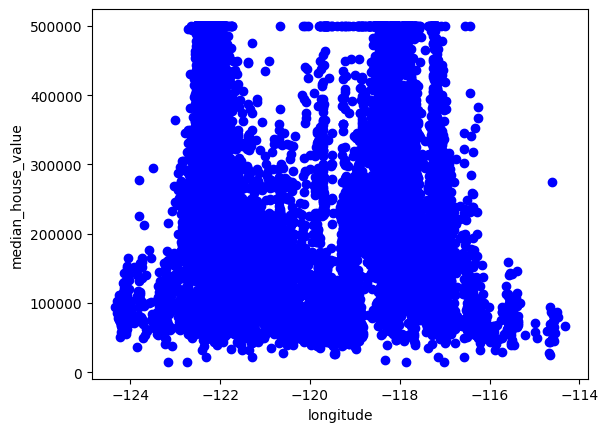

In [ ]:
plt.scatter(df.longitude, df1,  color='blue')
plt.xlabel("longitude")
plt.ylabel("median_house_value")
plt.show()

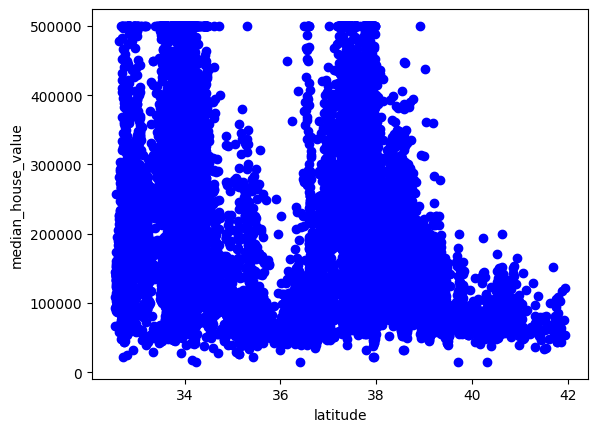

In [ ]:
plt.scatter(df.latitude, df1,  color='blue')
plt.xlabel("latitude")
plt.ylabel("median_house_value")
plt.show()

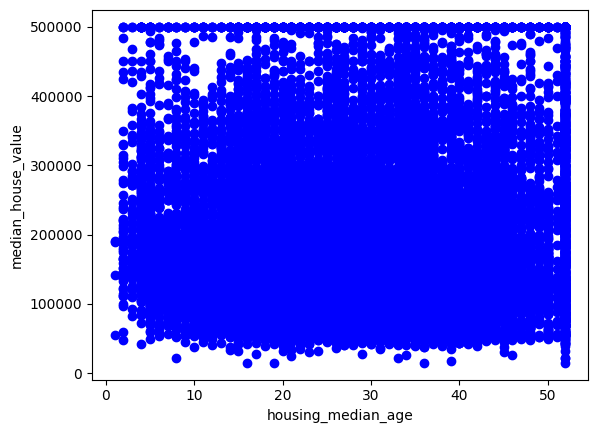

In [ ]:
plt.scatter(df.housing_median_age, df1,  color='blue')
plt.xlabel("housing_median_age")
plt.ylabel("median_house_value")
plt.show()

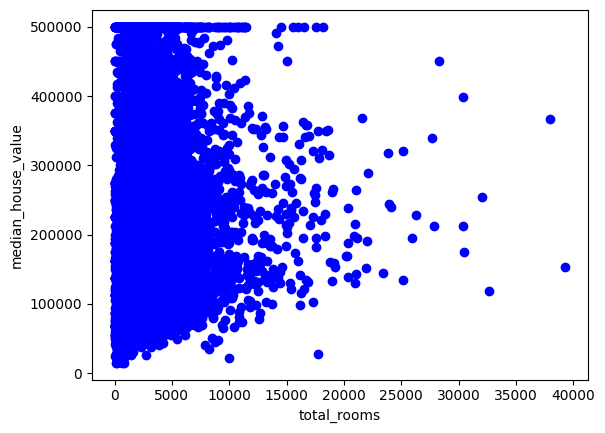

In [ ]:
plt.scatter(df.total_rooms, df1,  color='blue')
plt.xlabel("total_rooms")
plt.ylabel("median_house_value")
plt.show()

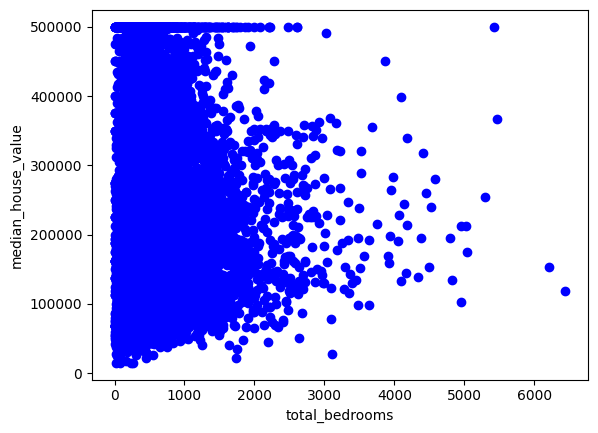

In [ ]:
plt.scatter(df.total_bedrooms, df1,  color='blue')
plt.xlabel("total_bedrooms")
plt.ylabel("median_house_value")
plt.show()

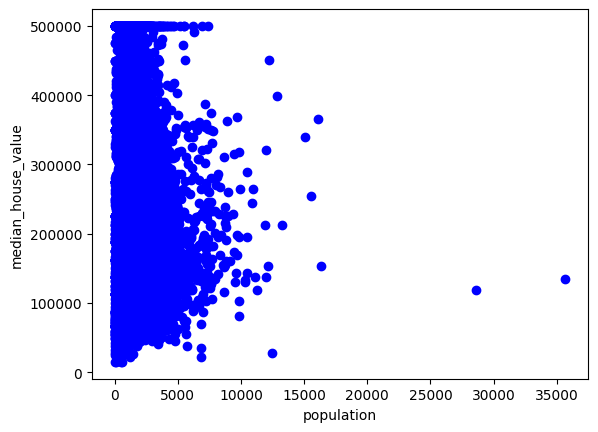

In [ ]:
plt.scatter(df.population, df1,  color='blue')
plt.xlabel("population")
plt.ylabel("median_house_value")
plt.show()

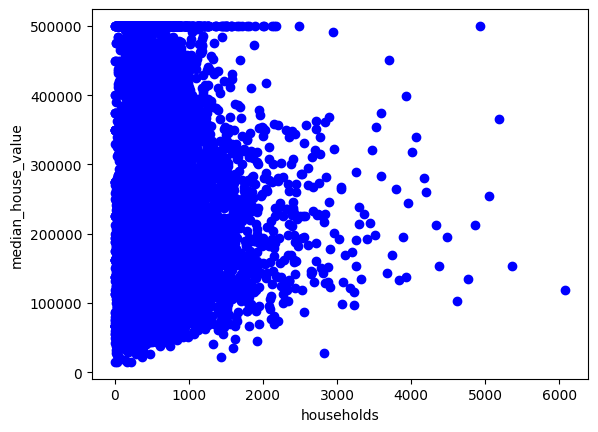

In [ ]:
plt.scatter(df.households, df1  color='blue')
plt.xlabel("households")
plt.ylabel("median_house_value")
plt.show()

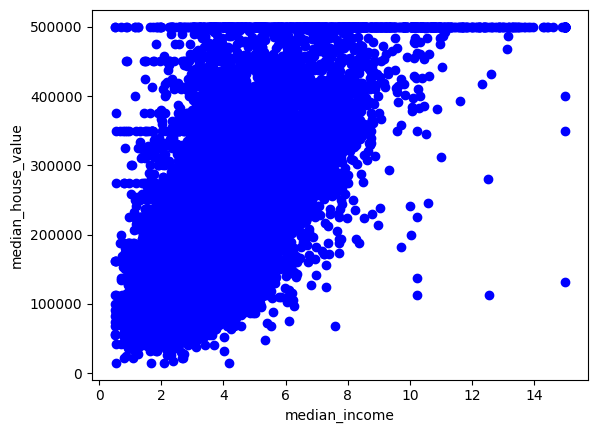

In [ ]:
plt.scatter(df.median_income, df1  color='blue')
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.show()

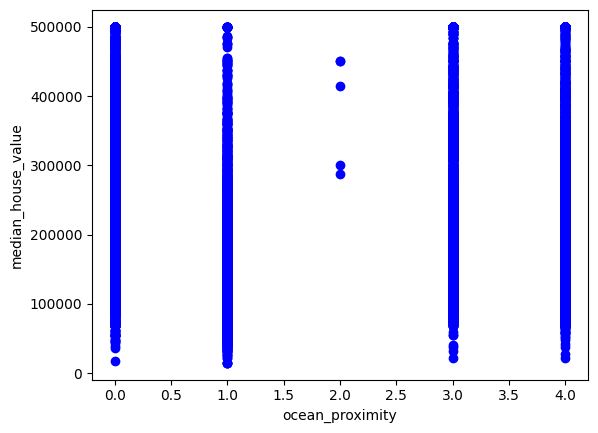

In [ ]:
plt.scatter(df.ocean_proximity, df1  color='blue')
plt.xlabel("ocean_proximity")
plt.ylabel("median_house_value")
plt.show()

# Modeling


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16512, 9)
(16512,)
(4128, 9)
(4128,)


In [ ]:
def met(name,key,arg):
    print('Name of the model: ',name)
    print('R-square of the model:',r2_score(key,arg))
    print('RMSE of the model:',np.sqrt(mean_squared_error(key,arg)))
    print('MAE of the model:',mean_absolute_error(key,arg))

In [ ]:
# LinearRegression

regr = LinearRegression()

regr.fit(x_train, y_train)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [-4.28077658e+04 -4.25657762e+04  1.18426973e+03 -8.13638808e+00
  1.16392023e+02 -3.85957093e+01  4.62029610e+01  4.05118332e+04
 -3.18827157e+02]
Intercept:  -3594630.7600678513


In [ ]:
y_hat = regr.predict(x_test)

met('LinearRegression model and result for test', y_test, y_hat)


Name of the model:  LinearRegression model and result for test
R-square of the model: 0.6142406531011781
RMSE of the model: 71098.69982050036
MAE of the model: 51846.8778490379


In [ ]:
rf = RandomForestRegressor()

rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_hat = rf.predict(x_test)

In [ ]:
met('RandomForestRegressor model and result for test', y_test, y_hat)

Name of the model:  RandomForestRegressor model and result for test
R-square of the model: 0.8102765769351918
RMSE of the model: 49861.33541800914
MAE of the model: 32045.125014534886


#Best Model -- Random Forest Regressor
*  R-Square -- 0.81


That is 81 percent of target can be explained by independent variables





**AmirMohammadShams**